# Introduction

During the lab, we will overview the basics of bayesian learning and boosting. First, we will implement a bayes classifier based on the maximum likelihood estimation. Then, we will boost classifier to improve classification (using Adaboost algorithm). Finally, we will compare the decision tree classifier to the bayes classifier.

In terms of technical code we will learn importants things because we will use a ordinary environment. It means usage of Python langage, jupyter nootebook, famous machine learning datasets (iris, vowel and olivetti faces),  and communs machine learning package/library (numpy, scipy, random, matplot and sklearn) 

In [113]:
import numpy as np
from scipy import misc
from imp import reload
from labfuns import *
import random

# fix random seed for the lab
random.seed(100)

# Bayes Classifier

### Assignement 1

In [114]:
# in:      X - N x d matrix of N data points
#     labels - N vector of class labels
# out:    mu - C x d matrix of class means (mu[i] - class i mean)
#      sigma - C x d x d matrix of class covariances (sigma[i] - class i sigma)
def mlParamsp1(X, labels, W=None):
    assert(X.shape[0]==labels.shape[0])
    Npts,Ndims = np.shape(X)
    classes = np.unique(labels)
    Nclasses = np.size(classes)

    if W is None:
        W = np.ones((Npts,1))/float(Npts)

    mu = np.zeros((Nclasses,Ndims))
    sigma = np.zeros((Nclasses,Ndims,Ndims))

    # ==========================
    # Computing mu
    Nkclasses = np.zeros(Nclasses)
    for i_pts in range(Npts):
        index_class = np.where(classes == labels[i_pts])[0][0]
        Nkclasses[index_class] += 1.0
        for i_dim in range(Ndims):
            mu[index_class][i_dim] += X[i_pts][i_dim]
    for i_class in range(Nclasses):
        for i_dim in range(Ndims):
            mu[i_class][i_dim] = mu[i_class][i_dim]/Nkclasses[i_class]
    # Computing sigma
    for i_pts in range(Npts):
        index_class = np.where(classes == labels[i_pts])[0][0]
        for i_dim in range(Ndims):
            sigma[index_class][i_dim][i_dim] += (X[i_pts][i_dim]-mu[index_class][i_dim])**2
    for i_class in range(Nclasses):
        for i_dim in range(Ndims):
            sigma[i_class][i_dim][i_dim] = sigma[i_class][i_dim][i_dim]/Nkclasses[i_class]
    # ==========================
    return mu, sigma

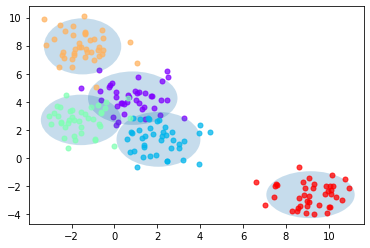

In [115]:
%matplotlib inline

X, labels = genBlobs(centers=5)
mu, sigma = mlParamsp1(X,labels)
plotGaussian(X,labels,mu,sigma)

### Assignement 2

In [116]:
# in: labels - N vector of class labels
# out: prior - C x 1 vector of class priors
def computePriorp1(labels, W=None):
    Npts = labels.shape[0]
    if W is None:
        W = np.ones((Npts,1))/Npts
    else:
        assert(W.shape[0] == Npts)
    classes = np.unique(labels)
    Nclasses = np.size(classes)

    prior = np.zeros((Nclasses,1))

    # ==========================
    # computing prior
    for i_label in range(Npts):
        index_class = np.where(classes == labels[i_label])[0][0]
        prior[index_class] +=1.0
    prior = prior/Npts
    # ==========================
    return prior

In [117]:
# in:      X - N x d matrix of M data points
#      prior - C x 1 matrix of class priors
#         mu - C x d matrix of class means (mu[i] - class i mean)
#      sigma - C x d x d matrix of class covariances (sigma[i] - class i sigma)
# out:     h - N vector of class predictions for test points
def classifyBayesp1(X, prior, mu, sigma):

    Npts = X.shape[0]
    Nclasses,Ndims = np.shape(mu)
    logProb = np.zeros((Nclasses, Npts))

    # ==========================
    for i_class in range(Nclasses):
        for i_pts in range(Npts):
            discr = 1.0
            for i_dim in range(Ndims):
                discr = discr* sigma[i_class][i_dim][i_dim]
            logProb[i_class][i_pts] = -0.5*np.log(abs(discr))
            product = 0.0
            for i_dim in range(Ndims):
                product += ((1.0/sigma[i_class][i_dim][i_dim]) * ((X[i_pts][i_dim]-mu[i_class][i_dim])**2))
            logProb[i_class][i_pts] += -0.5 * product
            logProb[i_class][i_pts] += np.log(prior[i_class])
    # ==========================
    
    # one possible way of finding max a-posteriori once
    # you have computed the log posterior
    h = np.argmax(logProb,axis=0)
    return h

### Assignement 3

In [118]:
class BayesClassifierp1(object):
    def __init__(self):
        self.trained = False

    def trainClassifier(self, X, labels, W=None):
        rtn = BayesClassifierp1()
        rtn.prior = computePriorp1(labels, W)
        rtn.mu, rtn.sigma = mlParamsp1(X, labels, W)
        rtn.trained = True
        return rtn

    def classify(self, X):
        return classifyBayesp1(X, self.prior, self.mu, self.sigma)

In [119]:
testClassifier(BayesClassifierp1(), dataset='iris', split=0.7)

Trial: 0 Accuracy 84.4
Trial: 10 Accuracy 95.6
Trial: 20 Accuracy 93.3
Trial: 30 Accuracy 86.7
Trial: 40 Accuracy 88.9
Trial: 50 Accuracy 91.1
Trial: 60 Accuracy 86.7
Trial: 70 Accuracy 91.1
Trial: 80 Accuracy 86.7
Trial: 90 Accuracy 91.1
Final mean classification accuracy  89 with standard deviation 4.16


/mnt/c/Users/fland/Desktop/5IF-KTH/DD2421-MACHINE_LEARNING/LAB3-bayes+boosting/labfuns.py:257: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xTr[trClIdx,0],xTr[trClIdx,1],marker='o',c=color,s=40,alpha=0.5, label="Class "+str(c)+" Train")
/mnt/c/Users/fland/Desktop/5IF-KTH/DD2421-MACHINE_LEARNING/LAB3-bayes+boosting/labfuns.py:258: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xTe[teClIdx,0],xTe[teClId

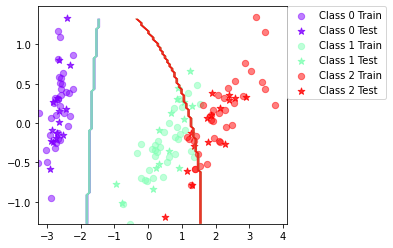

In [120]:
%matplotlib inline
plotBoundary(BayesClassifierp1(), dataset='iris',split=0.7)

In [121]:
testClassifier(BayesClassifierp1(), dataset='vowel', split=0.7)

Trial: 0 Accuracy 61
Trial: 10 Accuracy 66.2
Trial: 20 Accuracy 74
Trial: 30 Accuracy 66.9
Trial: 40 Accuracy 59.7
Trial: 50 Accuracy 64.3
Trial: 60 Accuracy 66.9
Trial: 70 Accuracy 63.6
Trial: 80 Accuracy 62.3
Trial: 90 Accuracy 70.8
Final mean classification accuracy  64.7 with standard deviation 4.03


>  When can a feature independence assumption be reasonable and when not?

> How does the decision boundary look for the Iris dataset? How could one improve the classification results for this scenario by changing classifier or, alternatively, manipulating the data?

# Boosting

### Assignement 4

In [122]:
# in:      X - N x d matrix of N data points
#     labels - N vector of class labels
#          W - N vector of weight of data points
# out:    mu - C x d matrix of class means (mu[i] - class i mean)
#      sigma - C x d x d matrix of class covariances (sigma[i] - class i sigma)
def mlParams(X, labels, W=None):
    assert(X.shape[0]==labels.shape[0])
    Npts,Ndims = np.shape(X)
    classes = np.unique(labels)
    Nclasses = np.size(classes)

    if W is None:
        W = np.ones((Npts,1))/float(Npts)

    mu = np.zeros((Nclasses,Ndims))
    sigma = np.zeros((Nclasses,Ndims,Ndims))

    # ==========================
    # Computing mu
    Nkclasses = np.zeros(Nclasses)
    Wkclasses = np.zeros(Nclasses)
    for i_pts in range(Npts):
        index_class = np.where(classes == labels[i_pts])[0][0]
        Wkclasses[index_class] += W[i_pts]
        for i_dim in range(Ndims):
            mu[index_class][i_dim] += X[i_pts][i_dim]*W[i_pts]
    for i_class in range(Nclasses):
        for i_dim in range(Ndims):
            mu[i_class][i_dim] = mu[i_class][i_dim]/Wkclasses[i_class]
    # Computing sigma
    for i_pts in range(Npts):
        index_class = np.where(classes == labels[i_pts])[0][0]
        for i_dim in range(Ndims):
            sigma[index_class][i_dim][i_dim] += W[i_pts]*((X[i_pts][i_dim]-mu[index_class][i_dim])**2)
    for i_class in range(Nclasses):
        for i_dim in range(Ndims):
            sigma[i_class][i_dim][i_dim] = sigma[i_class][i_dim][i_dim]/Wkclasses[i_class]
    # ==========================
    return mu, sigma

### Assignement 5

In [123]:
# in: labels - N vector of class labels
# out: prior - C x 1 vector of class priors
def computePrior(labels, W):
    Npts = labels.shape[0]
    if W is None:
        W = np.ones((Npts,1))/Npts
    else:
        assert(W.shape[0] == Npts)
    classes = np.unique(labels)
    Nclasses = np.size(classes)

    prior = np.zeros((Nclasses,1))

    # ==========================
    for i_pts in range(Npts):
        index_class = np.where(classes == labels[i_pts])[0][0]
        prior[index_class] += W[i_pts]
    # ==========================
    return prior/float(np.sum(prior))

In [124]:
# in:      X - N x d matrix of M data points
#      prior - C x 1 matrix of class priors
#         mu - C x d matrix of class means (mu[i] - class i mean)
#      sigma - C x d x d matrix of class covariances (sigma[i] - class i sigma)
# out:     h - N vector of class predictions for test points
def classifyBayes(X, prior, mu, sigma):

    Npts = X.shape[0]
    Nclasses,Ndims = np.shape(mu)
    logProb = np.zeros((Nclasses, Npts))

    # ==========================
    for i_class in range(Nclasses):
        for i_pts in range(Npts):
            discr = 1.0
            for i_dim in range(Ndims):
                discr = discr* sigma[i_class][i_dim][i_dim]
            logProb[i_class][i_pts] = -0.5*np.log(abs(discr))
            product = 0.0
            for i_dim in range(Ndims):
                product += ((1.0/sigma[i_class][i_dim][i_dim]) * ((X[i_pts][i_dim]-mu[i_class][i_dim])**2))
            logProb[i_class][i_pts] += -0.5 * product
            logProb[i_class][i_pts] += np.log(prior[i_class])
    # ==========================
    
    # one possible way of finding max a-posteriori once
    # you have computed the log posterior
    h = np.argmax(logProb,axis=0)
    return h

In [125]:
class BayesClassifier(object):
    def __init__(self):
        self.trained = False

    def trainClassifier(self, X, labels, W):
        rtn = BayesClassifier()
        rtn.prior = computePrior(labels, W)
        rtn.mu, rtn.sigma = mlParams(X, labels, W)
        rtn.trained = True
        return rtn

    def classify(self, X):
        return classifyBayes(X, self.prior, self.mu, self.sigma)

In [126]:
# in: base_classifier - a classifier of the type that we will boost, e.g. BayesClassifier
#                   X - N x d matrix of N data points
#              labels - N vector of class labels
#                   T - number of boosting iterations
# out:    classifiers - (maximum) length T Python list of trained classifiers
#              alphas - (maximum) length T Python list of vote weights
def trainBoost(base_classifier, X, labels, T=10):
    # these will come in handy later on
    Npts,Ndims = np.shape(X)

    classifiers = [] # append new classifiers to this list
    alphas = [] # append the vote weight of the classifiers to this list

    # The weights for the first iteration
    wCur = np.ones((Npts,1))/float(Npts)

    for i_iter in range(0, T):
        # a new classifier can be trained like this, given the current weights
        classifiers.append(base_classifier.trainClassifier(X, labels, wCur))

        # do classification for each point
        vote = classifiers[-1].classify(X)

        # ==========================
        # priorsCur = computePrior(labels, wCur):
        eCur = 0.0
        for i_pts in range(Npts):
            hyp = (vote[i_pts] == labels[i_pts])
            eCur += (wCur[i_pts]*(1.0-(1.0 if hyp else 0.0)))
        alpha = 0.5*(np.log(1-eCur)-np.log(eCur))
        alphas.append(alpha) # you will need to append the new alpha
        # update weights
        for i_pts in range(Npts):
            hyp = (vote[i_pts] == labels[i_pts])
            wCur[i_pts] = (wCur[i_pts])*(np.exp(-alpha) if hyp else np.exp(alpha))
        normFactor = float(np.sum(wCur))
        wCur = wCur / normFactor
        # ==========================
    return classifiers, alphas

In [127]:
# in:       X - N x d matrix of N data points
# classifiers - (maximum) length T Python list of trained classifiers as above
#      alphas - (maximum) length T Python list of vote weights
#    Nclasses - the number of different classes
# out:  yPred - N vector of class predictions for test points
def classifyBoost(X, classifiers, alphas, Nclasses):
    Npts = X.shape[0]
    Ncomps = len(classifiers)

    # if we only have one classifier, we may just classify directly
    if Ncomps == 1:
        return classifiers[0].classify(X)
    else:
        votes = np.zeros((Npts,Nclasses))

        # here we can do it by filling in the votes vector with weighted votes
        # ==========================
        hyp = np.zeros((Npts, Ncomps))
        # labels = classifiers[0].classify(X)
        for t in range(Ncomps):
            hypt = classifiers[t].classify(X)
            for i_pts in range(Npts):
                hyp[i_pts][t] = hypt[i_pts]

        for i_pts in range(Npts):
            # classifiers[0].classify(X[i_pts])
            for i_class in range(Nclasses):
                sum = 0.0
                for i_Ncomps in range(Ncomps):
                    # classifiers[i_Ncomps].classify(X[i_pts])
                    h = hyp[i_pts][i_Ncomps] == i_class
                    sum += alphas[i_Ncomps]* (1.0 if h else 0.0)
                    # sum += alphas[i_Ncomps][0]* 1.0
                votes[i_pts][i_class] = sum
        # ==========================

        # one way to compute yPred after accumulating the votes
        return np.argmax(votes,axis=1)

In [128]:
class BoostClassifier(object):
    def __init__(self, base_classifier, T=10):
        self.base_classifier = base_classifier
        self.T = T
        self.trained = False

    def trainClassifier(self, X, labels):
        rtn = BoostClassifier(self.base_classifier, self.T)
        rtn.nbr_classes = np.size(np.unique(labels))
        rtn.classifiers, rtn.alphas = trainBoost(self.base_classifier, X, labels, self.T)
        rtn.trained = True
        return rtn

    def classify(self, X):
        return classifyBoost(X, self.classifiers, self.alphas, self.nbr_classes)

In [129]:
testClassifier(BoostClassifier(BayesClassifier(), T=10), dataset='iris',split=0.7)

Trial: 0 Accuracy 95.6


/tmp/ipykernel_18810/2732376212.py:30: RuntimeWarning: divide by zero encountered in log
  alpha = 0.5*(np.log(1-eCur)-np.log(eCur))
/tmp/ipykernel_18810/2732376212.py:37: RuntimeWarning: invalid value encountered in divide
  wCur = wCur / normFactor
/tmp/ipykernel_18810/2163148249.py:32: RuntimeWarning: invalid value encountered in multiply
  sum += alphas[i_Ncomps]* (1.0 if h else 0.0)


Trial: 10 Accuracy 100
Trial: 20 Accuracy 93.3
Trial: 30 Accuracy 91.1
Trial: 40 Accuracy 97.8
Trial: 50 Accuracy 93.3
Trial: 60 Accuracy 93.3
Trial: 70 Accuracy 97.8
Trial: 80 Accuracy 95.6
Trial: 90 Accuracy 93.3
Final mean classification accuracy  94.1 with standard deviation 6.72


/mnt/c/Users/fland/Desktop/5IF-KTH/DD2421-MACHINE_LEARNING/LAB3-bayes+boosting/labfuns.py:257: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xTr[trClIdx,0],xTr[trClIdx,1],marker='o',c=color,s=40,alpha=0.5, label="Class "+str(c)+" Train")
/mnt/c/Users/fland/Desktop/5IF-KTH/DD2421-MACHINE_LEARNING/LAB3-bayes+boosting/labfuns.py:258: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xTe[teClIdx,0],xTe[teClId

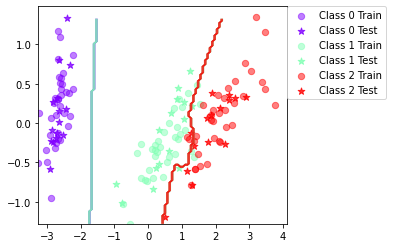

In [130]:
%matplotlib inline
plotBoundary(BoostClassifier(BayesClassifier()), dataset='iris',split=0.7)

In [131]:
testClassifier(BoostClassifier(BayesClassifier(), T=10), dataset='vowel',split=0.7)

Trial: 0 Accuracy 76.6
Trial: 10 Accuracy 86.4
Trial: 20 Accuracy 83.1
Trial: 30 Accuracy 80.5
Trial: 40 Accuracy 72.7
Trial: 50 Accuracy 76
Trial: 60 Accuracy 81.8
Trial: 70 Accuracy 82.5
Trial: 80 Accuracy 79.9
Trial: 90 Accuracy 83.1
Final mean classification accuracy  80.2 with standard deviation 3.52


> Is there any improvement in classification accuracy? Why/why not?

>  Compare the decision boundary of the boosted classifier with the basic one. What differences do you notice? Is the boundary of the boosted version more complex?

> Can we make up for not using a more advanced model in the basic classifier (e.g. independent features) by using boosting?

# Decision Tree

## Decision Tree Classifier

In [132]:
testClassifier(DecisionTreeClassifier(), dataset='iris', split=0.7)

Trial: 0 Accuracy 95.6
Trial: 10 Accuracy 100
Trial: 20 Accuracy 91.1
Trial: 30 Accuracy 91.1
Trial: 40 Accuracy 93.3
Trial: 50 Accuracy 91.1
Trial: 60 Accuracy 88.9
Trial: 70 Accuracy 88.9
Trial: 80 Accuracy 93.3
Trial: 90 Accuracy 88.9
Final mean classification accuracy  92.4 with standard deviation 3.71


/mnt/c/Users/fland/Desktop/5IF-KTH/DD2421-MACHINE_LEARNING/LAB3-bayes+boosting/labfuns.py:257: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xTr[trClIdx,0],xTr[trClIdx,1],marker='o',c=color,s=40,alpha=0.5, label="Class "+str(c)+" Train")
/mnt/c/Users/fland/Desktop/5IF-KTH/DD2421-MACHINE_LEARNING/LAB3-bayes+boosting/labfuns.py:258: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xTe[teClIdx,0],xTe[teClId

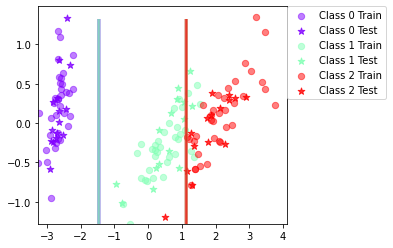

In [133]:
%matplotlib inline
plotBoundary(DecisionTreeClassifier(), dataset='iris',split=0.7)

In [134]:
testClassifier(DecisionTreeClassifier(), dataset='vowel',split=0.7)

Trial: 0 Accuracy 63.6
Trial: 10 Accuracy 68.8
Trial: 20 Accuracy 63.6
Trial: 30 Accuracy 66.9
Trial: 40 Accuracy 59.7
Trial: 50 Accuracy 63
Trial: 60 Accuracy 59.7
Trial: 70 Accuracy 68.8
Trial: 80 Accuracy 59.7
Trial: 90 Accuracy 68.2
Final mean classification accuracy  64.1 with standard deviation 4


## Decision Tree Classifier with boosting

In [135]:
testClassifier(BoostClassifier(DecisionTreeClassifier(), T=10), dataset='iris',split=0.7)

Trial: 0 Accuracy 95.6
Trial: 10 Accuracy 100
Trial: 20 Accuracy 95.6
Trial: 30 Accuracy 93.3
Trial: 40 Accuracy 93.3
Trial: 50 Accuracy 95.6
Trial: 60 Accuracy 88.9
Trial: 70 Accuracy 93.3
Trial: 80 Accuracy 93.3
Trial: 90 Accuracy 93.3
Final mean classification accuracy  94.6 with standard deviation 3.65


/mnt/c/Users/fland/Desktop/5IF-KTH/DD2421-MACHINE_LEARNING/LAB3-bayes+boosting/labfuns.py:257: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xTr[trClIdx,0],xTr[trClIdx,1],marker='o',c=color,s=40,alpha=0.5, label="Class "+str(c)+" Train")
/mnt/c/Users/fland/Desktop/5IF-KTH/DD2421-MACHINE_LEARNING/LAB3-bayes+boosting/labfuns.py:258: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xTe[teClIdx,0],xTe[teClId

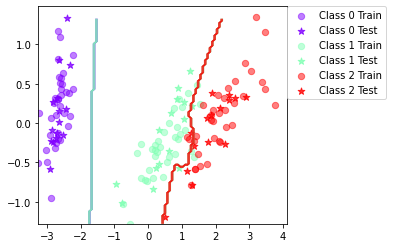

In [136]:
%matplotlib inline
plotBoundary(BoostClassifier(BayesClassifier()), dataset='iris',split=0.7)

In [137]:
testClassifier(BoostClassifier(BayesClassifier(), T=10), dataset='vowel',split=0.7)

Trial: 0 Accuracy 76.6
Trial: 10 Accuracy 86.4
Trial: 20 Accuracy 83.1
Trial: 30 Accuracy 80.5
Trial: 40 Accuracy 72.7
Trial: 50 Accuracy 76
Trial: 60 Accuracy 81.8
Trial: 70 Accuracy 82.5
Trial: 80 Accuracy 79.9
Trial: 90 Accuracy 83.1
Final mean classification accuracy  80.2 with standard deviation 3.52


# Conclusion

### Assignement 7

> If you had to pick a classifier, naive Bayes or a decision tree or the boosted versions of these, which one would you pick? Motivate from the following criteria:


- Outliers

I choose **decision tree** because naive bayes is more sensitive to outliers because it assumes independance between features and outliers significantly affect the estimation of probabilities (affect probabilities calculation). On the contrary, decision tree can still be sensitive to outliers but the impact is often less pronounced. Boosted versions of them can reduce impact of outliers by assigning more weight to misclassified instances (more robust). However, outliers would still have a bad effect on classification.

- Irrelevant inputs: part of the feature space is irrelevant

Probably that **decision tree** classifier is a better choice because they often prune irrevelant branches during training to reduce impact of them. On the contrary, naive bayes assumes independance between features and truly irrelevant features can still impact model predictions. Boosted versions of them can focus on informative features and reduce impact of irrevelant ones, making boosted models more robust to irrevelant inputs

- Predictive power

aa

- Mixed types of data: binary, categorical or continuous features, etc.

**Naive bayes** can be a good choice because can handles mixed types well including binary, categorical and continuous features. See One-hot encoding is useful for Machine Learning. Boosted versions of them improve the effectiveness of the model but are not especially related to types of data

- Scalability: the dimension of the data, D, is large or the number of instances, N, is large, or both.

A **naive Bayes** classifier is higly scalable with higher number of instances and with higher dimensions because the algorithm is simple and makes it computationally efficient. On the contrary, decision tree risk to increased computation with very deep trees. Of course, Boosted version of them are computationally more expensive.

Don't forget to use methods such as cross-validation and testing multiple algorithms on the dataset to determine the best-perfoming model. We don't have to be satisfied with a single test of our models to compare them